In [ ]:
## use both white and red wine datasets for quality prediction for an unsupervised machine learning project

In [30]:
## import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [31]:
## import sklearn libraries
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
import scipy.cluster.hierarchy as shc
import sklearn.metrics as sm
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import euclidean_distances


In [ ]:
## general wine quality parameters;
## acidity, tannins, sugar/sweetness, alcohol, fruit
## tannin= acts as a natural antioxidant to protect the wine once the grapes are harvested and produced, polyphenols(oxygen and hydrogen molecules) - grape seeds, grape skins = adds both bitterness and astringency - generally found in red wine, some in white wine if aged in wooden barrels or fermenting on skins. some grapres have higher content of tannin 
## balance ? all these parameters should balance each other for a good quality wine
## what about clarity and color?
## aging? how many years?

In [ ]:
## what is the data?

## how to make a good quality wine? It is a combination of art and science...
## "mother nature" is the first parameter - if you get frost- no harvest that year, you have no control on this

## the picking time is different with white wine and red wine - timing is very important - again men vs mother nature!!

## what are the definitions of each column?

## for acidity parameter = fixed acidity, volatile acidity and citric acid
## ## fixed acidity= refers to the set of low volatility organic acids such as malic, lactic, tartaric or citric acids
## ## volatile acidity= refers to the set of short chain organic acids that can be extracted from the sample by means of a distallation process
## ## citric acid= found in small quantities, citric acid adds flavor and freshness to the wine
## ph= describes how acidic or basic a wine is on a scale from 0 to 14; 0 being very acidic and 14 being very basic.


## for sugar/sweetness = residual sugar = the amount of sugar remaining after fermentation stops.  
## alcohol= once the grapes are harvested, they go under fermentation where yeast transforms the sugars present in the juice into a;cohol(ethanol). The higher the sugar levels in the grape, the higher the alcohol levels in the wine. It means better ripeness at harvest(best picking time) and fermentation to complete or near complete dryness.  The degree of alcohol in any given glass f wine is equivalent to its percentage by volume, the ideal alcohol content averages around 13.6%. The wine will have a richer, fuller body when it has a high alcohol level
## density= close to that of water depending on the alcohol and sugar content

## chlorides= the amount of salt in the wine, indicates the level of sodium chloride which contributes to the overall taste and quality of wine.

## sulfur dioxide= preservative to prevent oxidation and microbial spoilage , keeps it fruity as opposed to rotten and mouldy flavours, it should be added when the alcoholic fermentation is completely finished. There are 3 measurements; free, bound and total
## ## free FSO2= unreacted components and is made up of mostly molecular and bisulfite forms.  It prevents microbial growth and oxidation of wine
## ## bound SO2= the of the bisulfate form which binds with other wine components such as pigments and phenolics
## ## total TSO2= amount of free + amount of bound = 'how clean, balanced, stable the wine is' one way of thinking? the more TSO2 you have, the more stable the Free SO2 tends to be.
## sulphates= wine additive which contributes to SO2 levels and act as an antioxidant and antimicrobial,  enhances the wine

## quality= quality of each wine, rating between 0 and 10; 0 being very bad and 10 being very excellent.  Most wines have an average quality score with a median of 6. 


In [ ]:
## based on the definitions, I have three distinctive groups that have close relations within and have impact on the quality score of the wine;

## acidity = fixed acidity, volatile acidity, citric acid, ph
## sugar/sweetness = residual sugar, density, alcohol
## antimicrobial and antioxidation = free sulfur dioxide, total sulfur dioxide and sulphates

## will my grouping be proven with this data? we'll see...

In [32]:
## load the red wine dataset
red_wine= pd.read_csv('winequality-red.csv')
red_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [70]:
## load the white wine dataset
white_wine= pd.read_csv('winequality-white.csv')
white_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [34]:
## check the data types - red wine
red_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [35]:
## check the data type - white wine
white_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [ ]:
## there are no missing values in any of the datasets
## there are numerical data types throughout the datasets 

In [36]:
## check the statistics for red - are there any outliers?
red_wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


<Axes: >

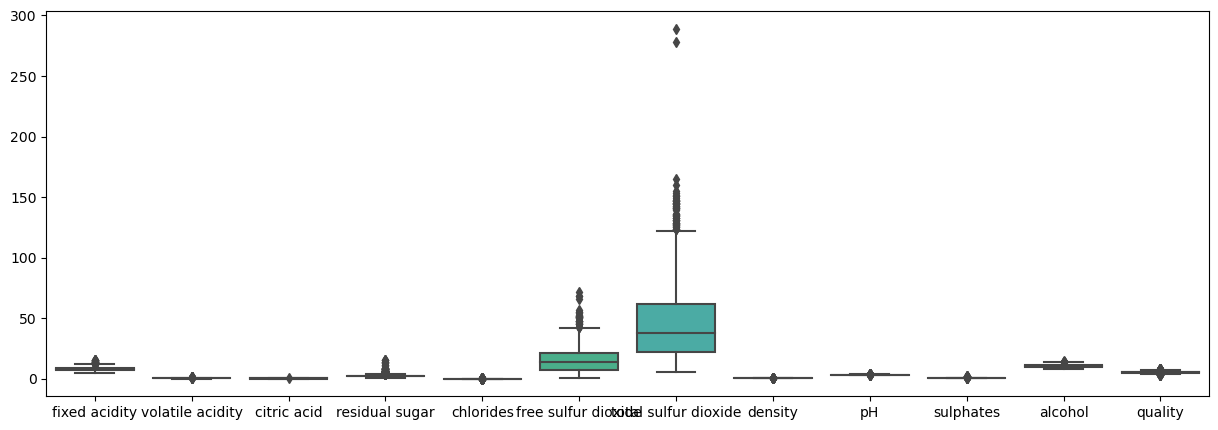

In [38]:
## check boxplot for outliers - red wine

fig, ax= plt.subplots(figsize= (15, 5))
sns.boxplot(red_wine)


In [ ]:
## it is obvious from the red wine boxplot that free sulfur dioxide and total sulfur dioxide are main outliers

In [39]:
# Calculate the 75th percentile of the 'total sulfur dioxide' column
percentile_75_total = np.percentile(red_wine['total sulfur dioxide'], 75)

# Replace the values greater than the 75th percentile with the median value
red_wine.loc[red_wine['total sulfur dioxide'] > percentile_75_total, 'total sulfur dioxide'] = red_wine['total sulfur dioxide'].median()

In [40]:
# Calculate the 75th percentile of the 'free sulfur dioxide' column
percentile_75_free = np.percentile(red_wine['free sulfur dioxide'], 75)

# Replace the values greater than the 75th percentile with the median value
red_wine.loc[red_wine['free sulfur dioxide'] > percentile_75_free, 'free sulfur dioxide'] = red_wine['free sulfur dioxide'].median()

In [41]:
# Calculate the 75th percentile of the 'residual sugar' column
percentile_75_sugar = np.percentile(red_wine['residual sugar'], 75)

# Replace the values greater than the 75th percentile with the median value
red_wine.loc[red_wine['residual sugar'] > percentile_75_sugar, 'residual sugar'] = red_wine['residual sugar'].median()

In [42]:
# Calculate the 75th percentile of the 'fixed acidity' column
percentile_75_fixedacid = np.percentile(red_wine['fixed acidity'], 75)

# Replace the values greater than the 75th percentile with the median value
red_wine.loc[red_wine['fixed acidity'] > percentile_75_fixedacid, 'fixed acidity'] = red_wine['fixed acidity'].median()

In [43]:
red_wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,7.605754,0.527821,0.270976,2.084584,0.087467,11.707630,32.664790,0.996747,3.311113,0.658149,10.422983,5.636023
std,0.815758,0.179060,0.194801,0.291448,0.047065,4.644062,13.068423,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,7.900000,0.640000,0.420000,2.200000,0.090000,14.000000,38.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,9.200000,1.580000,1.000000,2.600000,0.611000,21.000000,62.000000,1.003690,4.010000,2.000000,14.900000,8.000000


<Axes: >

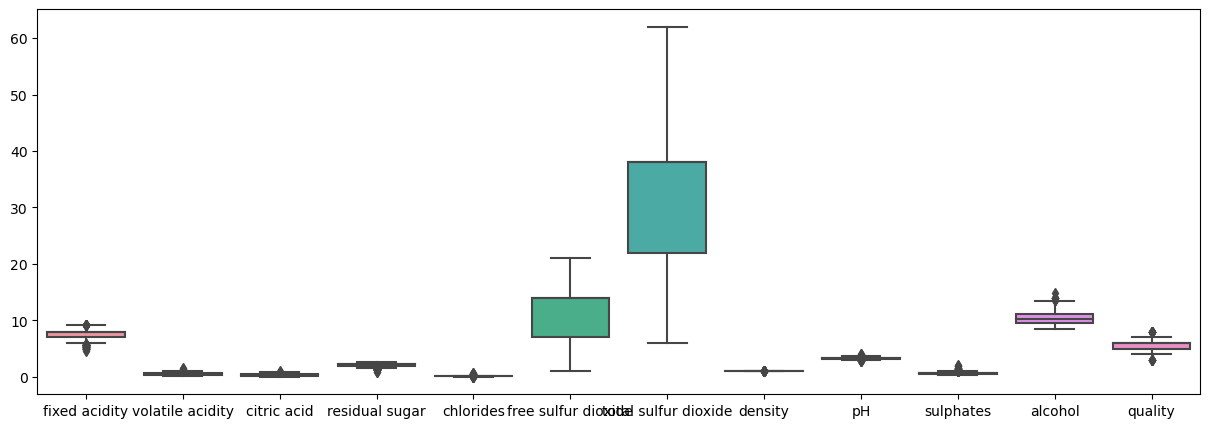

In [44]:
## check the outlier plot again - looks better now
fig, ax= plt.subplots(figsize= (15, 5))
sns.boxplot(red_wine)

In [71]:
## check the statistics for white - any outliers
white_wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


<Axes: >

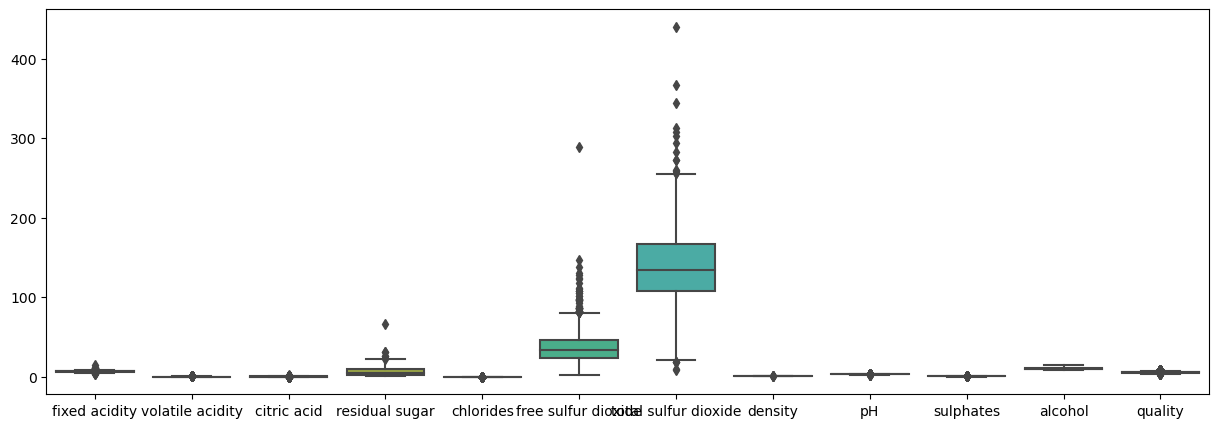

In [72]:
## check boxplot for outliers - white wine

fig, ax= plt.subplots(figsize= (15, 5))
sns.boxplot(white_wine)


In [ ]:
## white wine boxplot tells me that residual sugar, free sulfur dioxide and total sulfur dioxide are outliers.  
## update the outliers, anything higher than 75th percentile, replace it with its median

In [67]:
## do not change this for 'total sulfur dioxide', leave the outlier as it is
## everytime I change, it goes to the other side, and don't think it works as it should be so leave it as it is

# Calculate the 75th percentile of the 'total sulfur dioxide' column
##percentile_75_totalw = np.percentile(white_wine['total sulfur dioxide'], 75)

# Replace the values greater than the 75th percentile with the median value
##white_wine.loc[white_wine['total sulfur dioxide'] > percentile_75_totalw, 'total sulfur dioxide'] = white_wine['total sulfur dioxide'].median()

## replace the values greater than 200 with the mean
## white_wine.loc[white_wine['total sulfur dioxide'] > 200, 'total sulfur dioxide'] = white_wine['total sulfur dioxide'].mean()

In [73]:
# Calculate the 75th percentile of the 'free sulfur dioxide' column
percentile_75_freew = np.percentile(white_wine['free sulfur dioxide'], 75)

# Replace the values greater than the 75th percentile with the median value
white_wine.loc[white_wine['free sulfur dioxide'] > percentile_75_freew, 'free sulfur dioxide'] = white_wine['free sulfur dioxide'].median()

In [74]:
# Calculate the 75th percentile of the 'residual sugar' column
percentile_75_sugarw = np.percentile(white_wine['residual sugar'], 75)

# Replace the values greater than the 75th percentile with the median value
white_wine.loc[white_wine['residual sugar'] > percentile_75_sugarw, 'residual sugar'] = white_wine['residual sugar'].median()

In [75]:
white_wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,4.283993,0.045772,29.522764,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,2.448508,0.021848,9.448075,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,5.200000,0.050000,34.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,9.900000,0.346000,46.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


<Axes: >

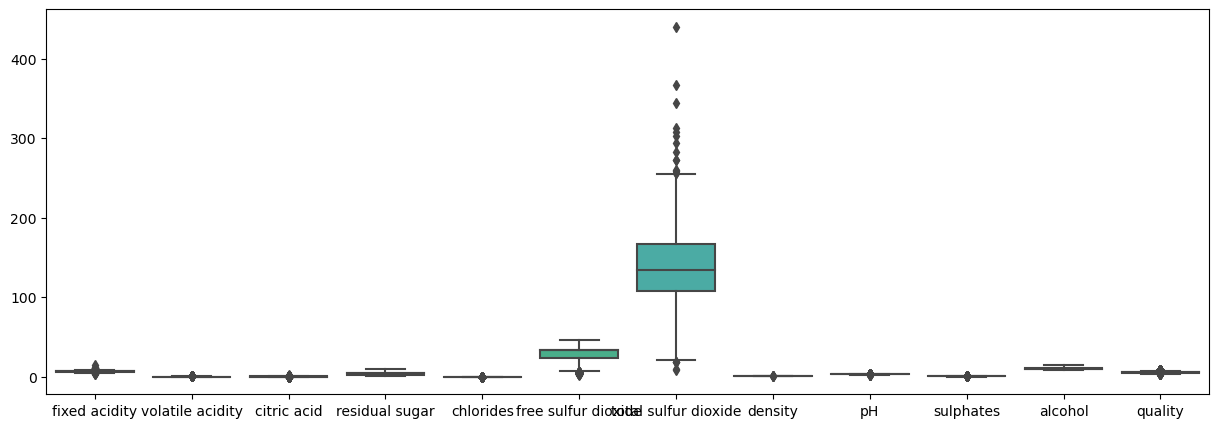

In [76]:
## check boxplot for outliers again- white wine

fig, ax= plt.subplots(figsize= (15, 5))
sns.boxplot(white_wine)


In [77]:
## start with a hetmap to understand the correlations, will they be similar to what I predict based on definitions?
red_wine_corr_matrix= red_wine.corr()
red_wine_corr_matrix

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.144052,0.415667,0.150863,0.172281,-0.122542,-0.038074,0.461803,-0.579534,0.134740,-0.213626,0.030348
volatile acidity,-0.144052,1.000000,-0.552496,0.032536,0.061298,0.033547,0.030447,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.415667,-0.552496,1.000000,0.125230,0.203823,-0.124434,-0.044580,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.150863,0.032536,0.125230,1.000000,-0.011640,0.059454,0.078796,0.316053,-0.033317,-0.011187,0.083662,0.043678
chlorides,0.172281,0.061298,0.203823,-0.011640,1.000000,-0.001431,0.054451,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.122542,0.033547,-0.124434,0.059454,-0.001431,1.000000,0.674102,-0.056071,0.127766,0.056151,-0.078454,-0.038571
total sulfur dioxide,-0.038074,0.030447,-0.044580,0.078796,0.054451,0.674102,1.000000,0.087337,0.051663,0.082271,-0.158506,-0.090016
density,0.461803,0.022026,0.364947,0.316053,0.200632,-0.056071,0.087337,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.579534,0.234937,-0.541904,-0.033317,-0.265026,0.127766,0.051663,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.134740,-0.260987,0.312770,-0.011187,0.371260,0.056151,0.082271,0.148506,-0.196648,1.000000,0.093595,0.251397


Text(0.5, 1.0, 'Heatmap Correlation Matrix')

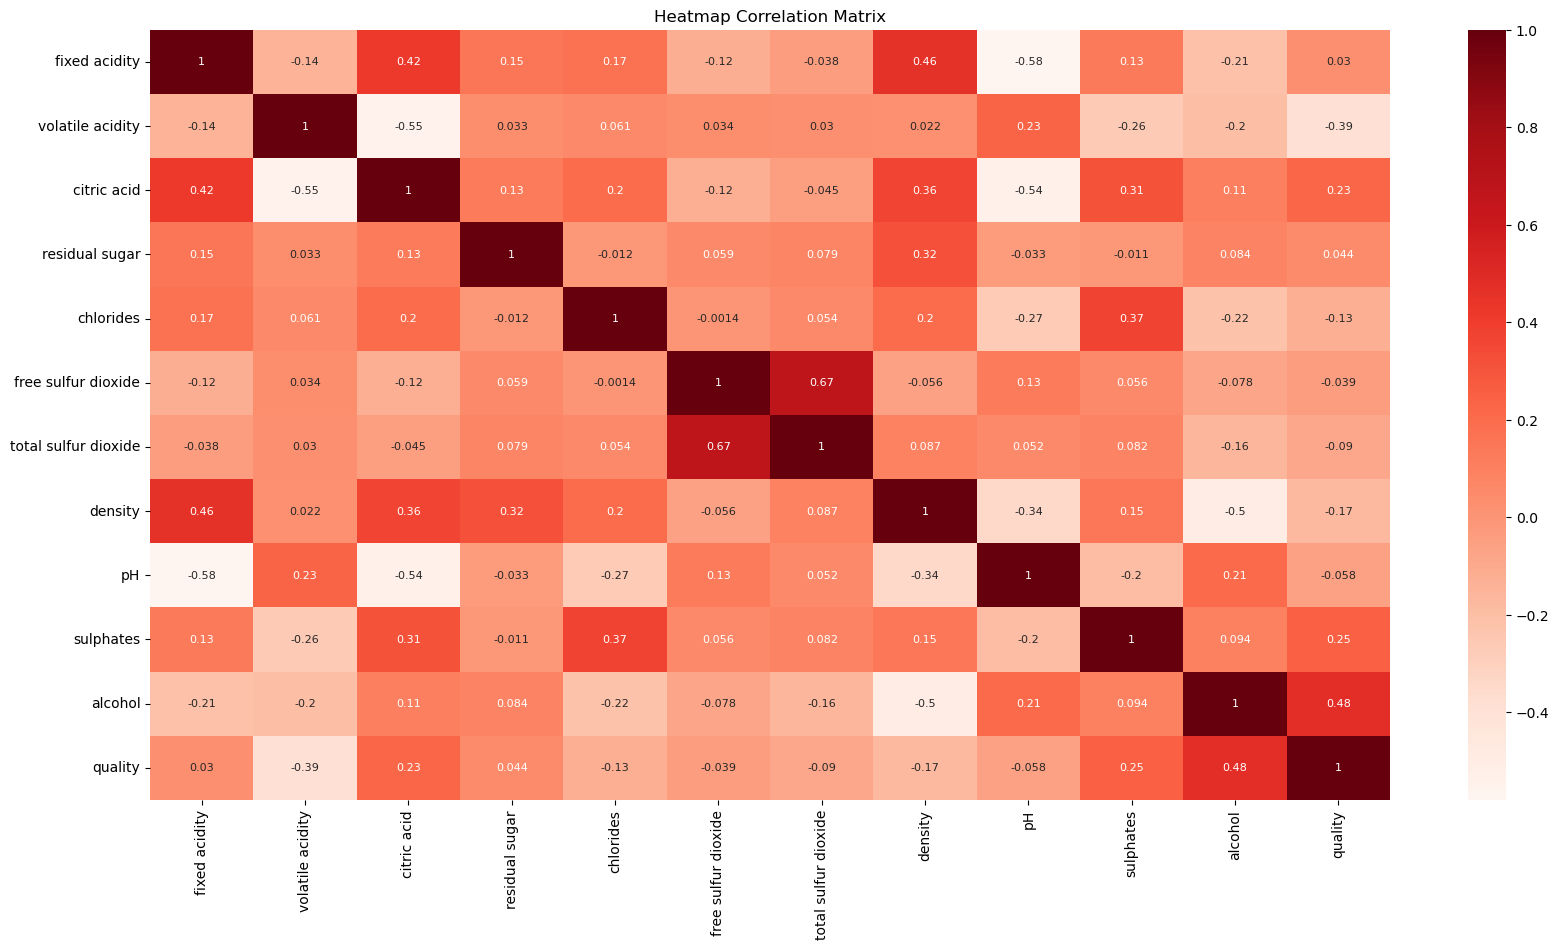

In [78]:
## plot the correlation matrix on a heatmap to see clearly the relations 
plt.figure(figsize=(20, 10))
sns.heatmap(red_wine_corr_matrix, annot=True, annot_kws={'size': 8}, cmap='Reds')
plt.title('Heatmap Correlation Matrix', loc='center')

In [ ]:
## red wine heatmap= strong relations with;

## for acidity - these following relations all make sense as they are highly correlated by definiiton also - density may need more investigating
## fixed acidity vs citric acid
## fixed acidity vs density
## fixed acidity vs pH
## volatile acidity vs citric acid
## citric acid vs pH

## free vs total sulfur dioxide

## density vs alcohol 

Text(0.5, 1.0, 'Quality of Red Wine acc to Fixed Acidity and Density')

<Figure size 1000x1000 with 0 Axes>

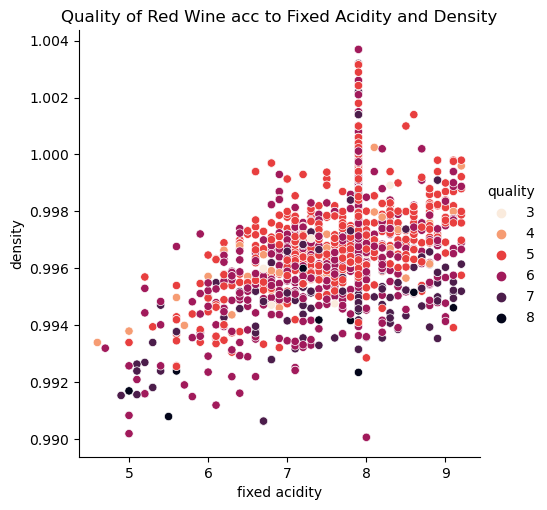

In [79]:
## red wine for fixed acidity and density against quality

plt.figure(figsize=(10,10))

sns.relplot(data= red_wine, x='fixed acidity', y='density', hue='quality', palette='rocket_r')
plt.title('Quality of Red Wine acc to Fixed Acidity and Density')

In [ ]:
## not sure if it is a good idea to replace the outliers for fixed acidity, there is too much data points on '8', I will leave it as it is.

(-0.05, 1.05)

<Figure size 1000x1000 with 0 Axes>

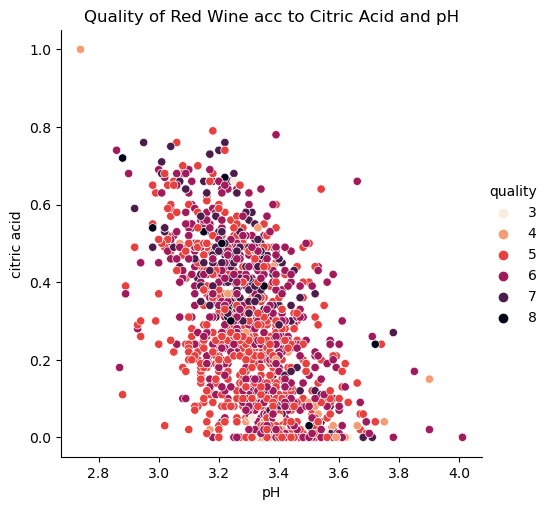

In [161]:
## red wine for ph and citric acid against quality

plt.figure(figsize=(10,10))

sns.relplot(data= red_wine, y='citric acid', x='pH', hue='quality', palette='rocket_r')
plt.title('Quality of Red Wine acc to Citric Acid and pH')
plt.xlim()
plt.ylim()

In [ ]:
## quality levels are higher when the citric acid level increases, especially after 0.3 which is in line with the definition of citric acid, it gives more flavour and depth to the wine and therefore increases the quality

Text(0.5, 1.0, 'Quality of Red Wine acc to alcohol and density')

<Figure size 1000x1000 with 0 Axes>

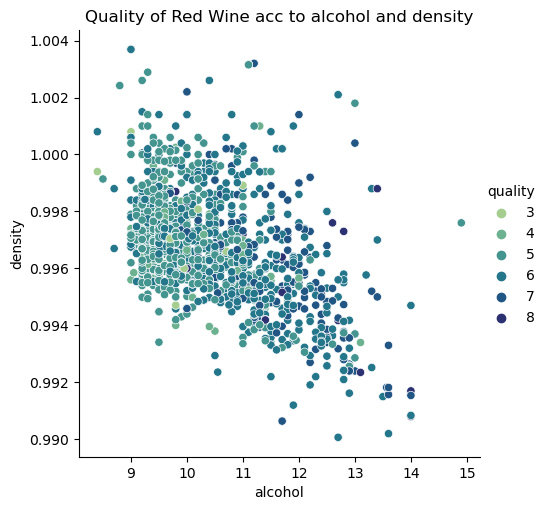

In [81]:
## try a different version of plot - relplot= relationship plot in seaborn
## red wine 

plt.figure(figsize=(10,10))

sns.relplot(data= red_wine, x='alcohol', y='density', hue='quality', palette='crest')
## plt.axhline(200, ls='--', linewidth= 3, color= 'red')
plt.title('Quality of Red Wine acc to alcohol and density')

In [ ]:
## as the alcohol level increases, the level of density comes down, the quality gets better especially after 11% alcohol level.

(0.0, 70.0)

<Figure size 1000x1000 with 0 Axes>

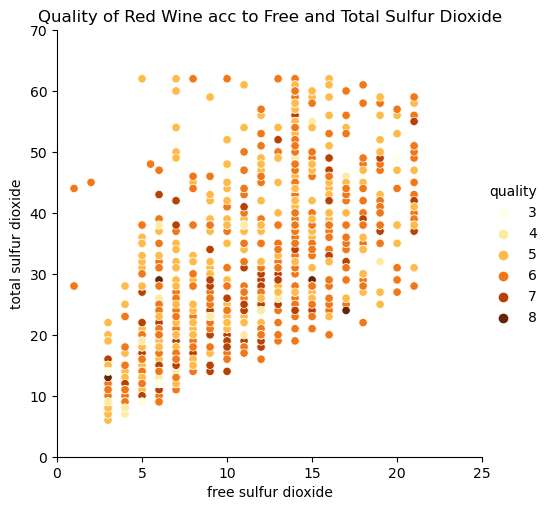

In [163]:
## red wine for free sulfur dioxide and total sulfur dioxide against quality  

plt.figure(figsize=(10,10))

sns.relplot(data= red_wine, x='free sulfur dioxide', y='total sulfur dioxide', hue='quality', palette='YlOrBr')
plt.title('Quality of Red Wine acc to Free and Total Sulfur Dioxide')
plt.xlim(0,25)
plt.ylim(0,70)

In [83]:
## apply to white wine as well; a hetmap to understand the correlations.
white_wine_corr_matrix= white_wine.corr()
white_wine_corr_matrix

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.022697,0.289181,0.035533,0.023086,-0.047325,0.091070,0.265331,-0.425858,-0.017143,-0.120881,-0.113663
volatile acidity,-0.022697,1.000000,-0.149472,0.102728,0.070512,-0.116690,0.089261,0.027114,-0.031915,-0.035728,0.067718,-0.194723
citric acid,0.289181,-0.149472,1.000000,0.016440,0.114364,0.053150,0.121131,0.149503,-0.163748,0.062331,-0.075729,-0.009209
residual sugar,0.035533,0.102728,0.016440,1.000000,0.039694,0.223840,0.348452,0.512125,-0.114115,-0.076020,-0.259597,-0.055769
chlorides,0.023086,0.070512,0.114364,0.039694,1.000000,0.052004,0.198910,0.257211,-0.090439,0.016763,-0.360189,-0.209934
free sulfur dioxide,-0.047325,-0.116690,0.053150,0.223840,0.052004,1.000000,0.474975,0.222007,0.040745,0.033897,-0.152834,0.147589
total sulfur dioxide,0.091070,0.089261,0.121131,0.348452,0.198910,0.474975,1.000000,0.529881,0.002321,0.134562,-0.448892,-0.174737
density,0.265331,0.027114,0.149503,0.512125,0.257211,0.222007,0.529881,1.000000,-0.093591,0.074493,-0.780138,-0.307123
pH,-0.425858,-0.031915,-0.163748,-0.114115,-0.090439,0.040745,0.002321,-0.093591,1.000000,0.155951,0.121432,0.099427
sulphates,-0.017143,-0.035728,0.062331,-0.076020,0.016763,0.033897,0.134562,0.074493,0.155951,1.000000,-0.017433,0.053678


Text(0.5, 1.0, 'Heatmap - White Wine Correlation Matrix')

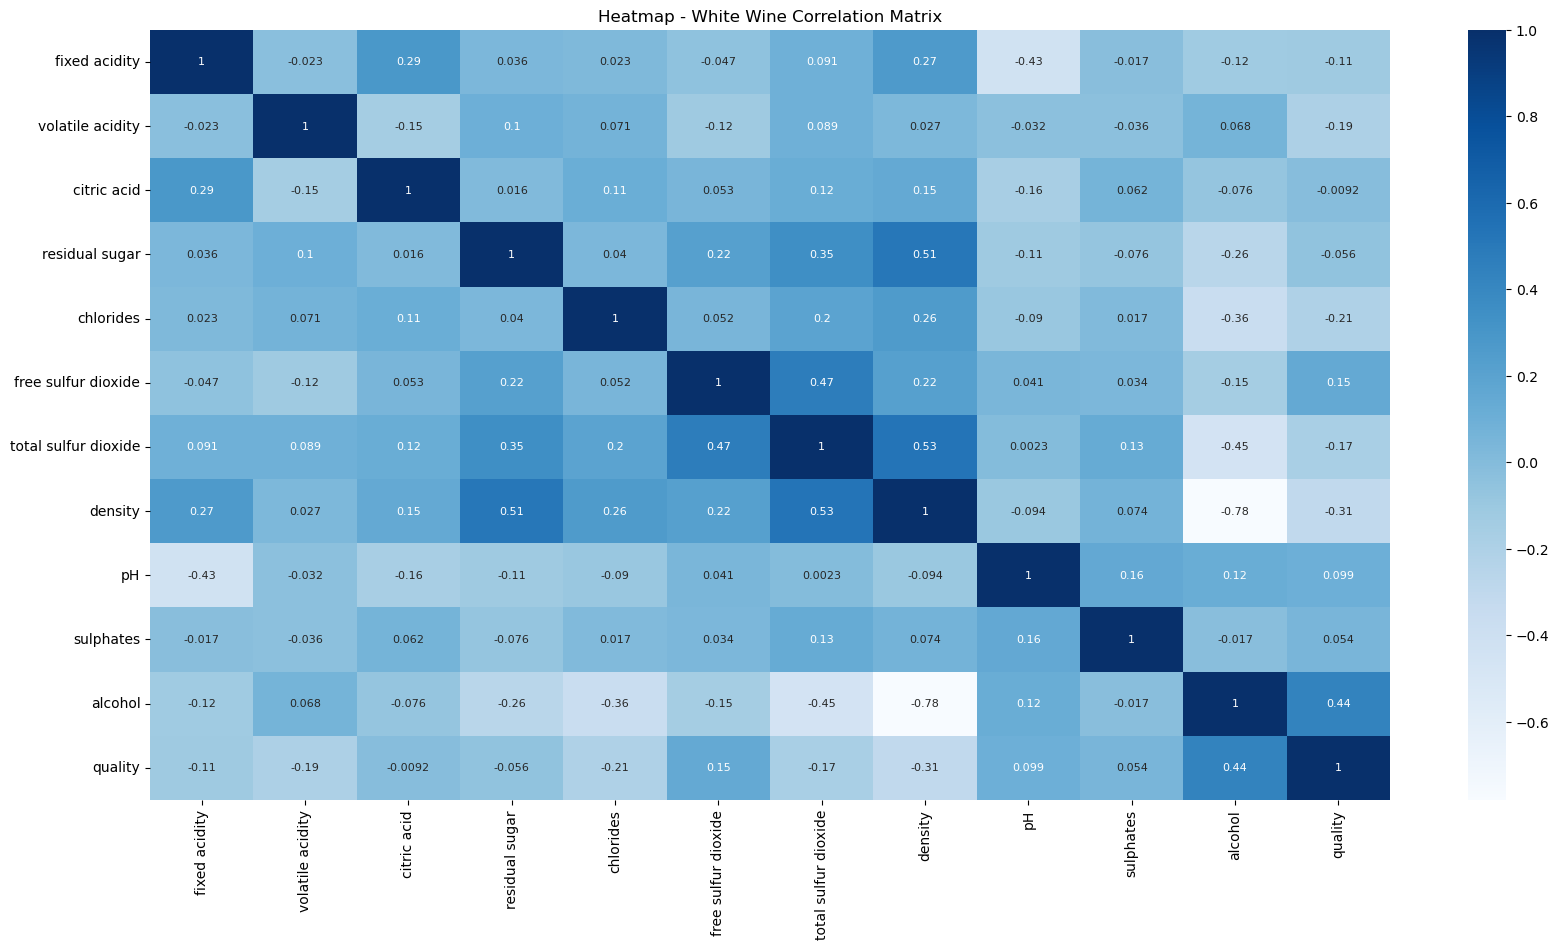

In [84]:
## plot the correlation matrix on a heatmap to see clearly the relations  - on white wine 
plt.figure(figsize=(20, 10))
sns.heatmap(white_wine_corr_matrix, annot=True, annot_kws={'size': 8}, cmap='Blues')
plt.title('Heatmap - White Wine Correlation Matrix', loc='center')

In [ ]:
## white wine heatmap= strong relations with density and alcohol, residual sugar; ph and fixed acidity, total and free sulfur dioxide

Text(0.5, 1.0, 'Quality of White Wine acc to alcohol and density')

<Figure size 1000x1000 with 0 Axes>

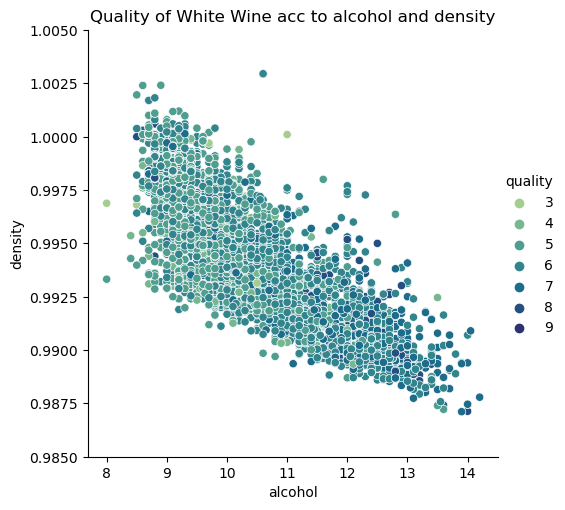

In [85]:
## try relplot with white wine

plt.figure(figsize=(10,10))

sns.relplot(data= white_wine, x='alcohol', y='density', hue='quality', palette='crest')
plt.ylim(0.985, 1.005)
plt.title('Quality of White Wine acc to alcohol and density')

In [ ]:
## as the alcohol level increases, the density comes down and the quality goes up - which is expected.

Text(0.5, 1.0, 'Quality of White Wine acc to Density and Residual Sugar')

<Figure size 1000x1000 with 0 Axes>

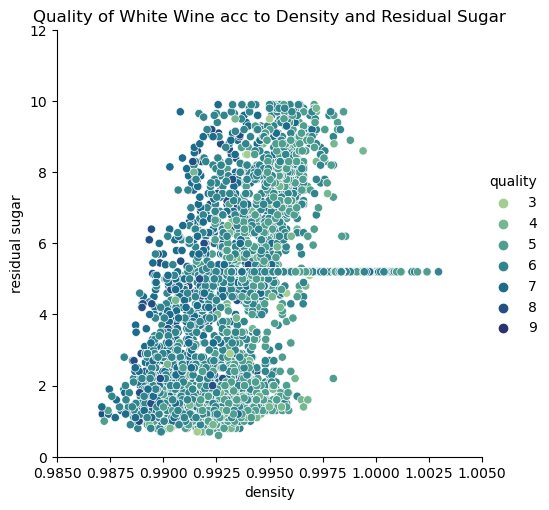

In [165]:
## white wine for density and residual sugar against quality

plt.figure(figsize=(10,10))

sns.relplot(data= white_wine, x='density', y='residual sugar', hue='quality', palette='crest')
plt.xlim(0.985, 1.005)
plt.ylim(0, 12)
plt.title('Quality of White Wine acc to Density and Residual Sugar')

In [ ]:
## there are too much data points on residual sugar at level '5', not happy about this
## I need to find a better way of spreading the outliers among the whole data so to prevent this accumulation of data at one level.

Text(0.5, 1.0, 'Quality of White Wine acc to pH and fixed Acidity')

<Figure size 1000x1000 with 0 Axes>

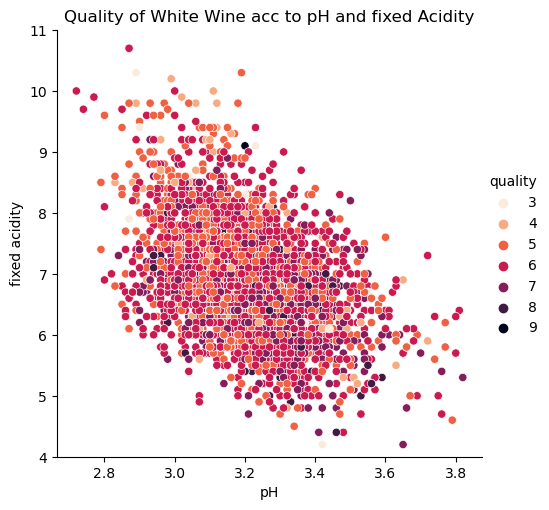

In [87]:
## white wine for pH and fixed acidity against quality  

plt.figure(figsize=(10,10))

sns.relplot(data= white_wine, x='pH', y='fixed acidity', hue='quality', palette='rocket_r')
plt.xlim()
plt.ylim(4, 11)
plt.title('Quality of White Wine acc to pH and fixed Acidity')

(0.0, 75.0)

<Figure size 1000x1000 with 0 Axes>

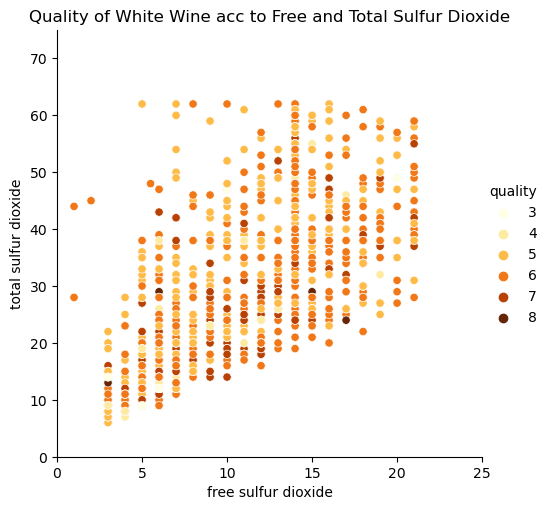

In [166]:
## white wine for free sulfur dioxide and total sulfur dioxide against quality  

plt.figure(figsize=(10,10))

sns.relplot(data= red_wine, x='free sulfur dioxide', y='total sulfur dioxide', hue='quality', palette='YlOrBr')
plt.title('Quality of White Wine acc to Free and Total Sulfur Dioxide')
plt.xlim(0,25)
plt.ylim(0,75)

<function matplotlib.pyplot.show(close=None, block=None)>

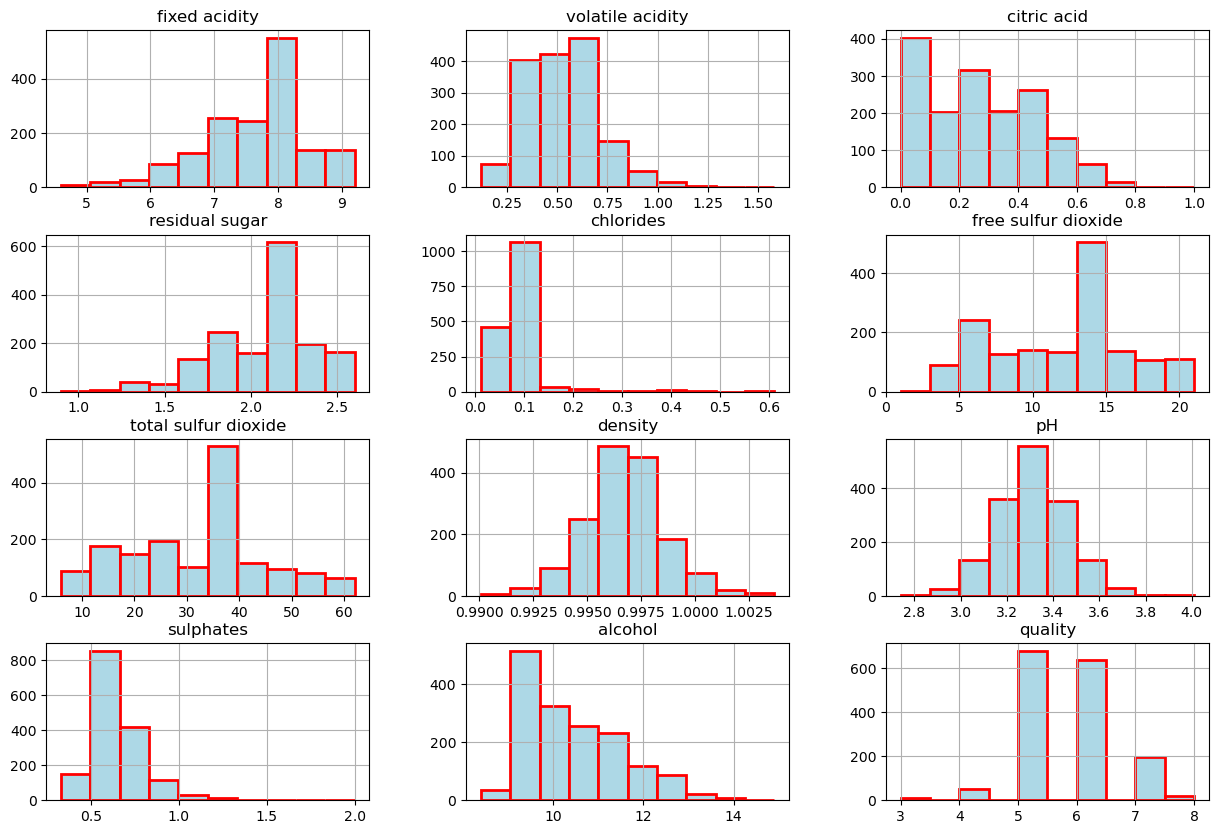

In [89]:
## before going into each parameter, let me check each variables histogram plot - try with a different edge color
red_wine.hist(bins=10, figsize=(15,10), color='lightblue', ec='red', lw= 2)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

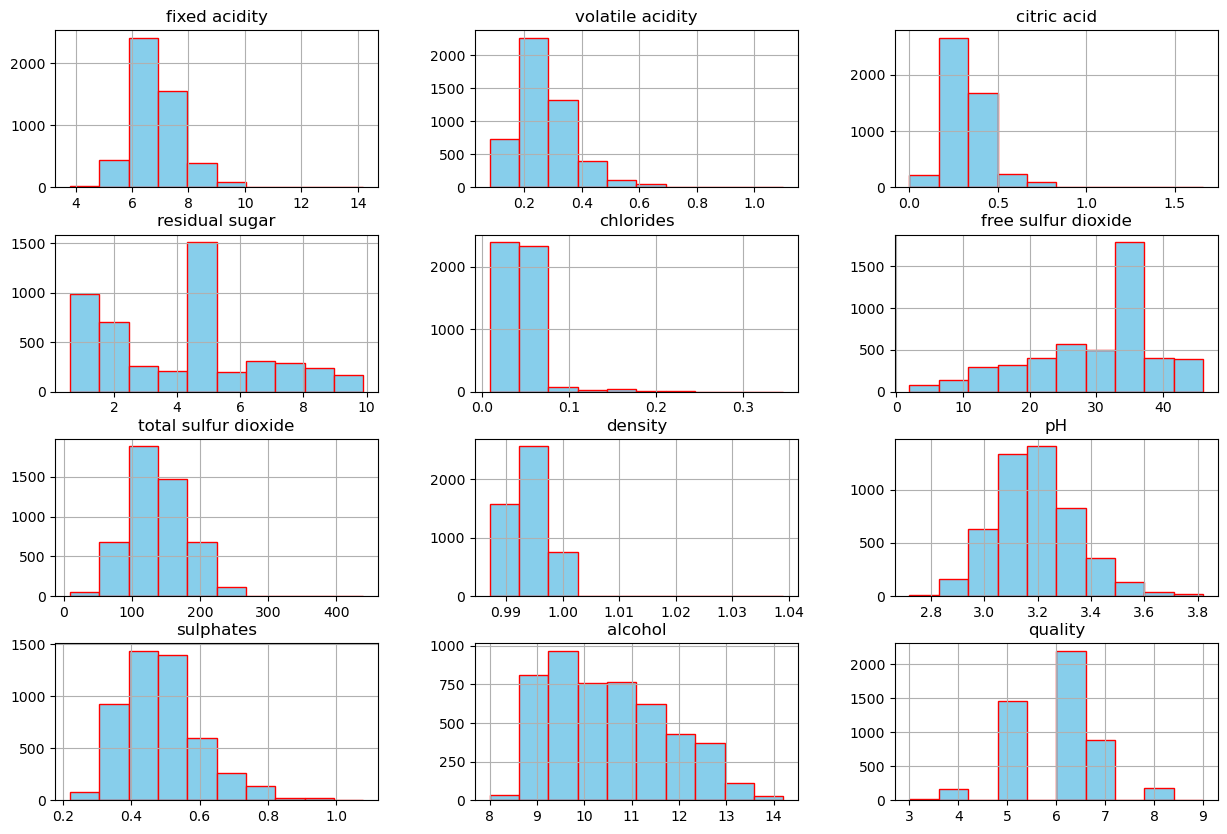

In [90]:
## before going into each parameter, let me check each variables histogram plot
white_wine.hist(bins=10, figsize=(15,10), color='skyblue', ec='red')
plt.show

<Axes: xlabel='quality', ylabel='count'>

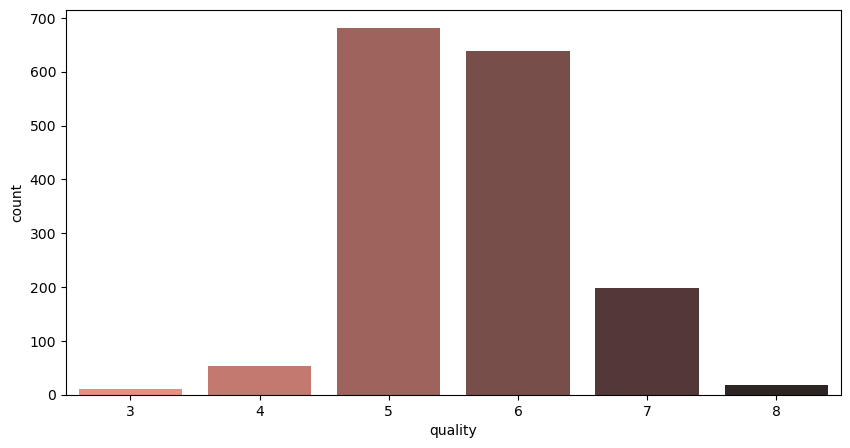

In [91]:
## quality scores in red wine
plt.figure(figsize=(10,5))
sns.countplot(x='quality',data=red_wine, palette='dark:salmon_r')

<Axes: xlabel='quality', ylabel='count'>

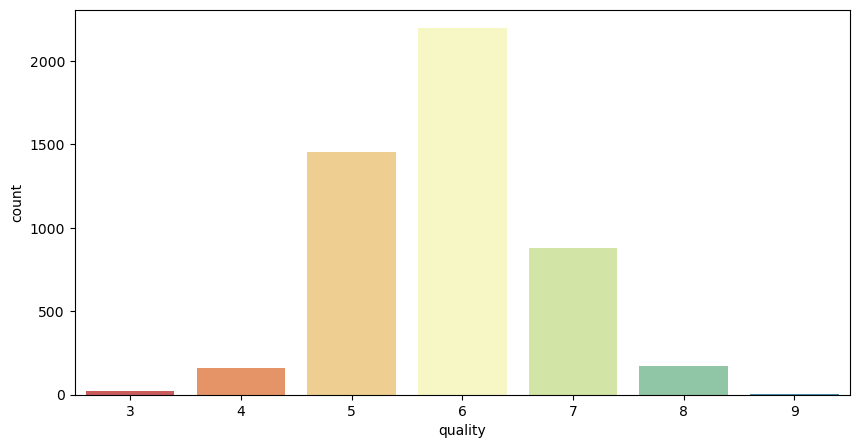

In [92]:
## quality scores in white wine
plt.figure(figsize=(10,5))
sns.countplot(x='quality',data=white_wine, palette='Spectral')

In [ ]:
## looking at the quality levels on both red wine and white wine datasets, white wine dataset looks better solely on the number of entries, red wine has 1599 and white wine has 4898, so more than 3 times worth of data is available in white wine dataset.  
## I would have expected more high quality red wines but there are only few at 7 or 8 levels, and none at 9 or 10 quality levels

In [ ]:
#################################################

## MODELLING PROCESS for UNSUPERVISED MACHINE LEARNING

## 1ST - AGGLOMERATIVE CLUSTERING

In [93]:
## normalize the data - for clustering we have to normalize
red_wine_data_norm= normalize(red_wine)
red_wine_data_norm= pd.DataFrame(red_wine_data_norm, columns=red_wine.columns)
red_wine_data_norm.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.193478,0.018302,0.000000,0.049677,0.001987,0.287602,0.888952,0.026088,0.091771,0.014642,0.245769,0.130728
1,0.181783,0.020509,0.000000,0.060594,0.002284,0.326277,0.885610,0.023231,0.074578,0.015848,0.228394,0.116528
2,0.134949,0.013149,0.000692,0.039793,0.001592,0.259517,0.934261,0.017249,0.056402,0.011246,0.169551,0.086506
3,0.123396,0.004374,0.008747,0.029677,0.001171,0.265535,0.937183,0.015588,0.049358,0.009059,0.153073,0.093718
4,0.193478,0.018302,0.000000,0.049677,0.001987,0.287602,0.888952,0.026088,0.091771,0.014642,0.245769,0.130728


In [94]:
## normalize the data - for clustering we have to normalize
white_wine_data_norm= normalize(white_wine)
white_wine_data_norm= pd.DataFrame(white_wine_data_norm, columns=white_wine.columns)
white_wine_data_norm.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.039677,0.001530,0.002041,0.029475,0.000255,0.255070,0.963596,0.005674,0.017005,0.002551,0.049880,0.034009
1,0.047219,0.002249,0.002548,0.011992,0.000367,0.104932,0.989359,0.007450,0.024734,0.003673,0.071204,0.044971
2,0.078777,0.002723,0.003890,0.067107,0.000486,0.291767,0.943382,0.009678,0.031705,0.004279,0.098228,0.058353
3,0.037936,0.001212,0.001686,0.044786,0.000306,0.179142,0.980012,0.005246,0.016808,0.002108,0.052162,0.031613
4,0.037936,0.001212,0.001686,0.044786,0.000306,0.179142,0.980012,0.005246,0.016808,0.002108,0.052162,0.031613


<function matplotlib.pyplot.show(close=None, block=None)>

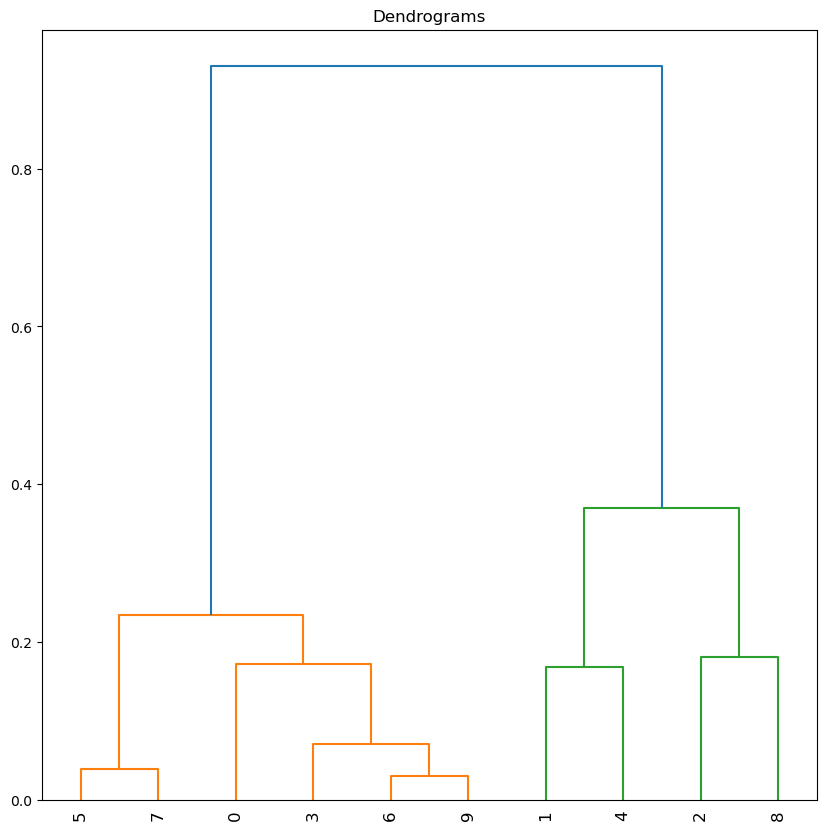

In [95]:
## create a dendrogram - red wine
## everytime scipy assigns values and everytime we run scipy on the same data, we will get a different denrogram

red_wine_subset_data= red_wine_data_norm.sample(n=10)
plt.figure(figsize=(10, 10))
plt.title('Dendrograms')
dend_red= shc.dendrogram(shc.linkage(red_wine_subset_data, method= 'ward'))

plt.xticks(rotation=90)
plt.show


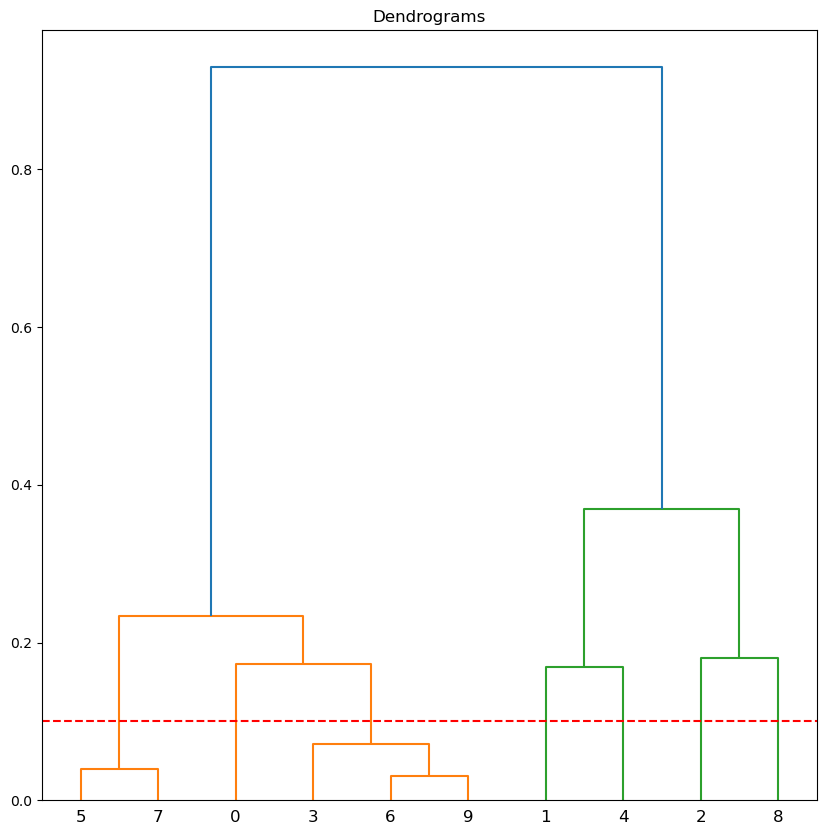

In [96]:
## cut point is shown by axhline y=0.1 plotted by red line - red wine

plt.figure(figsize=(10,10))
plt.title('Dendrograms')
dend_red = shc.dendrogram(shc.linkage(red_wine_subset_data, method='ward'))
plt.axhline(y=0.1, color='r', linestyle='--')


In [97]:
## train model - red wine
## create 3 clusters with n_clusters=3 / choose a different cluster number to compare

cluster_red =  AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage= 'ward')
cluster_red.fit_predict(red_wine_data_norm)

/Users/lalebaksi/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


array([1, 1, 1, ..., 1, 1, 1])

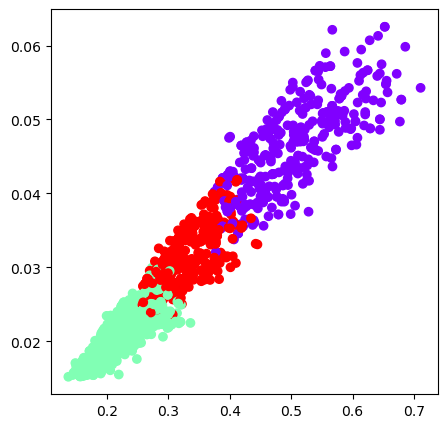

In [98]:
## scatter plot to show the clusters - red wine

plt.figure(figsize=(5,5))
plt.scatter(red_wine_data_norm['alcohol'], red_wine_data_norm['density'], c=cluster_red.labels_, cmap='rainbow')

In [99]:
## get the clustr labels
labels_red= cluster_red.labels_

## calculate the cluster centroids
centroids_red= []
for label in np.unique(labels_red):
    centroids_red.append(np.mean(red_wine_data_norm[labels_red== label], axis=0))


In [100]:
## calculate WCSS
wcss=0
for label in np.unique(labels_red):
    cluster_points_red= red_wine_data_norm[labels_red== label]
    cluster_centroid_red= centroids_red[label]
    distances_red= euclidean_distances(cluster_points_red, [cluster_centroid_red])
    squared_distances_red= np.square(distances_red)
    wcss += np.sum(squared_distances_red)

print('WCSS:', wcss)

WCSS: 23.38047003557544


In [101]:
print(cluster_centroid_red)

fixed acidity           0.244054
volatile acidity        0.016423
citric acid             0.008615
residual sugar          0.066133
chlorides               0.002610
free sulfur dioxide     0.325628
total sulfur dioxide    0.806093
density                 0.032061
pH                      0.106104
sulphates               0.021292
alcohol                 0.336306
quality                 0.184425
dtype: float64


In [102]:
print(distances_red)

[[0.21322122]
 [0.18759213]
 [0.06879168]
 [0.09835049]
 [0.05363041]
 [0.19920873]
 [0.1317713 ]
 [0.06454239]
 [0.06594567]
 [0.21842966]
 [0.13352304]
 [0.10672404]
 [0.19392545]
 [0.08035935]
 [0.21474957]
 [0.10523931]
 [0.0814534 ]
 [0.15198441]
 [0.0624321 ]
 [0.13450424]
 [0.13450424]
 [0.05398829]
 [0.06419067]
 [0.07467088]
 [0.07467088]
 [0.10181011]
 [0.07668789]
 [0.13233443]
 [0.06396772]
 [0.06396772]
 [0.1231711 ]
 [0.1231711 ]
 [0.16297677]
 [0.1784607 ]
 [0.12617059]
 [0.1945072 ]
 [0.1945072 ]
 [0.12617059]
 [0.1945072 ]
 [0.18265028]
 [0.21786187]
 [0.06707731]
 [0.14672453]
 [0.1362459 ]
 [0.1362459 ]
 [0.13181648]
 [0.0867293 ]
 [0.18741637]
 [0.07043534]
 [0.06486932]
 [0.13394115]
 [0.0371785 ]
 [0.069878  ]
 [0.06660054]
 [0.068226  ]
 [0.16778985]
 [0.05707939]
 [0.05707939]
 [0.05707939]
 [0.14319795]
 [0.13392461]
 [0.19995106]
 [0.14267391]
 [0.05203085]
 [0.06913404]
 [0.05814736]
 [0.14184036]
 [0.18837236]
 [0.14184036]
 [0.1012896 ]
 [0.1418298 ]
 [0.17

<function matplotlib.pyplot.show(close=None, block=None)>

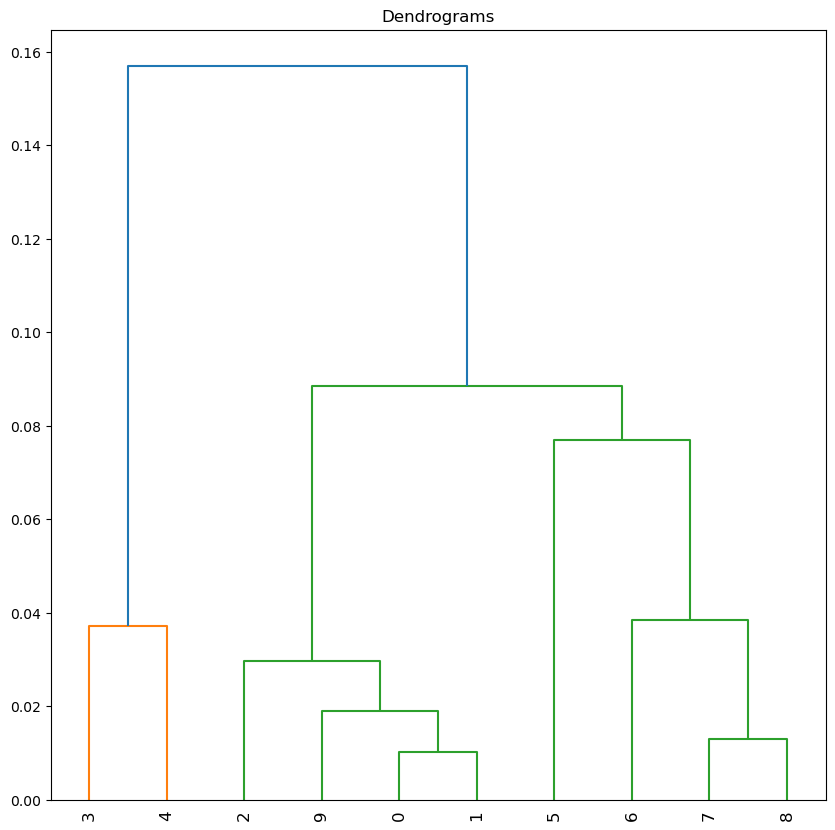

In [103]:
## create a dendrogram - white wine

white_wine_subset_data= white_wine_data_norm.sample(n=10)
plt.figure(figsize=(10, 10))
plt.title('Dendrograms')
dend_white= shc.dendrogram(shc.linkage(white_wine_subset_data, method= 'ward'))

plt.xticks(rotation=90)
plt.show

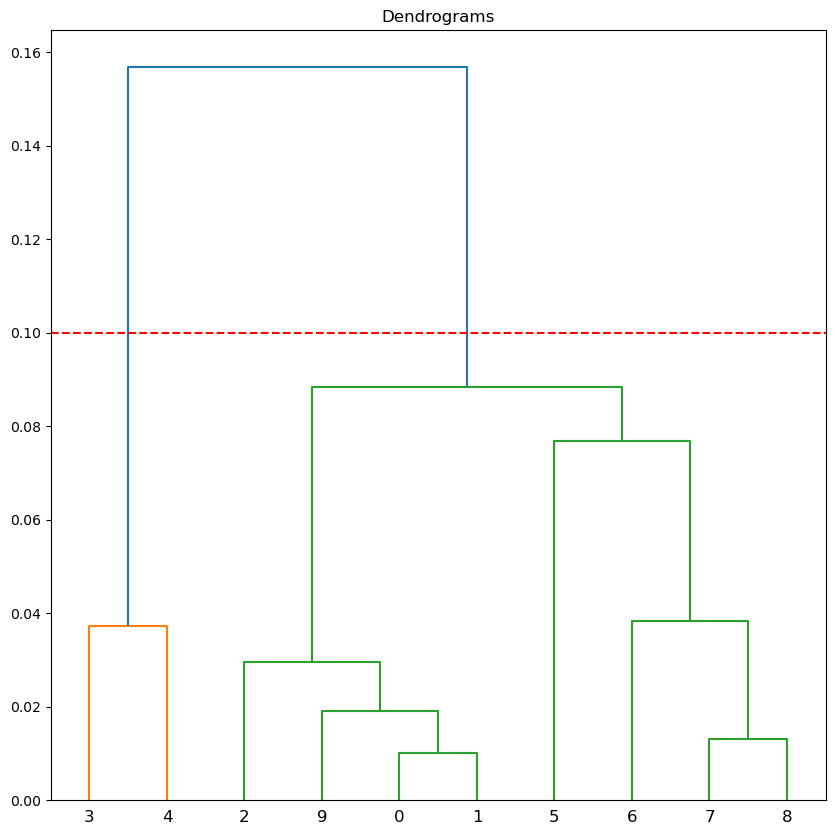

In [104]:
# cut point is shown by axhline y=0.1 plotted by red line - white wine

plt.figure(figsize=(10,10))
plt.title('Dendrograms')
dend_white = shc.dendrogram(shc.linkage(white_wine_subset_data, method='ward'))
plt.axhline(y=0.1, color='r', linestyle='--')

In [105]:
## train model - white wine
## create 3 clusters

cluster_white =  AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage= 'ward')
cluster_white.fit_predict(white_wine_data_norm)

/Users/lalebaksi/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


array([2, 1, 0, ..., 2, 1, 2])

(-0.0002865319385730986, 0.05550393968268643)

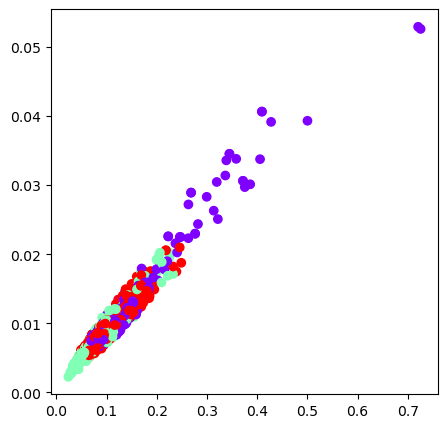

In [167]:
## scatter plot to show the clusters - white wine

plt.figure(figsize=(5,5))
plt.scatter(white_wine_data_norm['alcohol'], white_wine_data_norm['density'], c=cluster_white.labels_, cmap='rainbow')
plt.xlim()
plt.ylim()

In [107]:
## get the cluster labels - white wine
labels_white= cluster_white.labels_

## calculate the cluster centroids
centroids_white= []
for label in np.unique(labels_white):
    centroids_white.append(np.mean(white_wine_data_norm[labels_white== label], axis=0))


In [108]:
## calculate WCSS_white
wcss_white=0
for label in np.unique(labels_white):
    cluster_points_white= white_wine_data_norm[labels_white== label]
    cluster_centroid_white= centroids_white[label]
    distances_white= euclidean_distances(cluster_points_white, [cluster_centroid_white])
    squared_distances_white= np.square(distances_white)
    wcss_white += np.sum(squared_distances_white)

print('WCSS:', wcss_white)

WCSS: 19.511753628559283


In [ ]:
## TRAIN THE SAME MODEL WITH 2 CLUSTERS FOR COMPARISON FOR RED WINE AND WHITE WINE

In [ ]:
## RED WINE WITH 2 AGGLOMERATIVE CLUSTERING

In [109]:
## train model - red wine
## create 2 clusters with n_clusters=2 to compare

cluster_red_2 =  AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage= 'ward')
cluster_red_2.fit_predict(red_wine_data_norm)

/Users/lalebaksi/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


array([0, 0, 0, ..., 0, 0, 0])

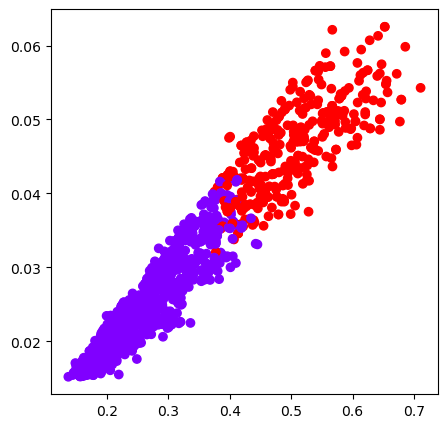

In [110]:
## scatter plot to show the clusters - red wine

plt.figure(figsize=(5,5))
plt.scatter(red_wine_data_norm['alcohol'], red_wine_data_norm['density'], c=cluster_red_2.labels_, cmap='rainbow')

In [111]:
## get the clustr labels
labels_red_2= cluster_red_2.labels_

## calculate the cluster centroids
centroids_red_2= []
for label in np.unique(labels_red):
    centroids_red_2.append(np.mean(red_wine_data_norm[labels_red== label], axis=0))

In [112]:
## calculate WCSS
wcss_2=0
for label in np.unique(labels_red_2):
    cluster_points_red_2= red_wine_data_norm[labels_red== label]
    cluster_centroid_red_2= centroids_red_2[label]
    distances_red_2= euclidean_distances(cluster_points_red_2, [cluster_centroid_red_2])
    squared_distances_red_2= np.square(distances_red_2)
    wcss_2 += np.sum(squared_distances_red_2)

print('WCSS:', wcss_2)

WCSS: 17.12811361313745


/Users/lalebaksi/anaconda3/lib/python3.10/site-packages/seaborn/relational.py:858: UserWarning: relplot is a figure-level function and does not accept the `ax` parameter. You may wish to try scatterplot
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'Agglomerative with 2 Clusters')

<Figure size 1000x1000 with 0 Axes>

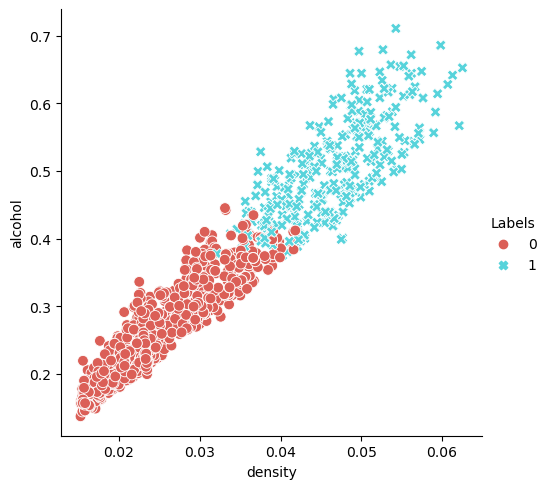

In [113]:
## different version of plot with 2 Agglm. clusters

RW= red_wine_data_norm
RW['Labels'] = cluster_red_2.labels_

plt.figure(figsize=(10,10))
sns.relplot(data=RW, x= 'density', y= 'alcohol', hue= 'Labels', style= 'Labels', palette=sns.color_palette('hls', 2), s=60, ax=ax)
ax.set_title('Agglomerative with 2 Clusters')

In [ ]:
### AGGL CLUSTERING WITH 2 CLUSTER FOR WHITE WINE

In [114]:
## train model - white wine
## create 2 clusters

cluster_white_2 =  AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage= 'ward')
cluster_white_2.fit_predict(white_wine_data_norm)

/Users/lalebaksi/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


array([0, 1, 0, ..., 0, 1, 0])

(-0.0002865319385730986, 0.05550393968268643)

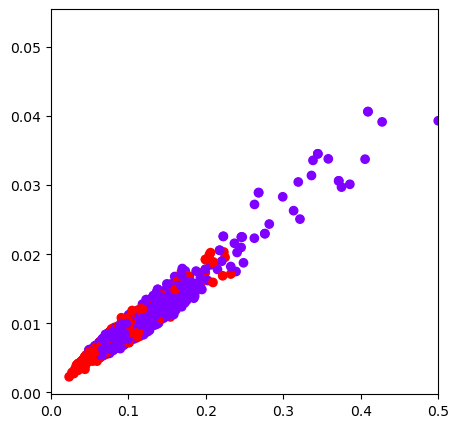

In [115]:
## scatter plot to show the 2 clusters - white wine

plt.figure(figsize=(5,5))
plt.scatter(white_wine_data_norm['alcohol'], white_wine_data_norm['density'], c=cluster_white_2.labels_, cmap='rainbow')
plt.xlim(0.0, 0.5)
plt.ylim()

In [116]:
## get the 2 cluster labels - white wine
labels_white_2= cluster_white_2.labels_

## calculate the cluster centroids
centroids_white_2= []
for label in np.unique(labels_white_2):
    centroids_white_2.append(np.mean(white_wine_data_norm[labels_white_2== label], axis=0))


In [117]:
## calculate WCSS_white_2
wcss_white_2=0
for label in np.unique(labels_white_2):
    cluster_points_white_2= white_wine_data_norm[labels_white_2== label]
    cluster_centroid_white_2= centroids_white_2[label]
    distances_white_2= euclidean_distances(cluster_points_white_2, [cluster_centroid_white_2])
    squared_distances_white_2= np.square(distances_white_2)
    wcss_white_2 += np.sum(squared_distances_white_2)

print('WCSS:', wcss_white_2)

WCSS: 25.59735960434452


/Users/lalebaksi/anaconda3/lib/python3.10/site-packages/seaborn/relational.py:858: UserWarning: relplot is a figure-level function and does not accept the `ax` parameter. You may wish to try scatterplot
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'Agglomerative White Wine Analysis with 2 Clusters')

<Figure size 1000x1000 with 0 Axes>

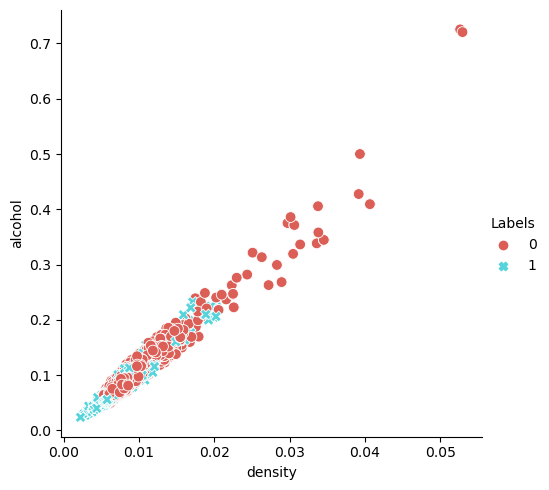

In [118]:
# different version of plot with 2 Agglm. clusters FOR WHITE WINE

RW_white= white_wine_data_norm
RW_white['Labels'] = cluster_white_2.labels_

plt.figure(figsize=(10,10))
sns.relplot(data=RW_white, x= 'density', y= 'alcohol', hue= 'Labels', style= 'Labels', palette=sns.color_palette('hls', 2), s=60, ax=ax)
ax.set_title('Agglomerative White Wine Analysis with 2 Clusters')

In [87]:
##########################################   

#### 2ND - KMEANS CLUSTERING 

In [ ]:
## use the normalized dataset from Agglomerative Clustering but name it differently to prevent confusion
## I have first used Standardization for this version but my WCSS was off the charts so changed it to normalization
## It works better this way

In [119]:
red_wine_K = normalize(red_wine)
red_wine_K= pd.DataFrame(red_wine_K, columns=red_wine.columns)
red_wine_K.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.193478,0.018302,0.000000,0.049677,0.001987,0.287602,0.888952,0.026088,0.091771,0.014642,0.245769,0.130728
1,0.181783,0.020509,0.000000,0.060594,0.002284,0.326277,0.885610,0.023231,0.074578,0.015848,0.228394,0.116528
2,0.134949,0.013149,0.000692,0.039793,0.001592,0.259517,0.934261,0.017249,0.056402,0.011246,0.169551,0.086506
3,0.123396,0.004374,0.008747,0.029677,0.001171,0.265535,0.937183,0.015588,0.049358,0.009059,0.153073,0.093718
4,0.193478,0.018302,0.000000,0.049677,0.001987,0.287602,0.888952,0.026088,0.091771,0.014642,0.245769,0.130728


In [121]:
## split the dataset for red wine; X_red

X_red_K= red_wine_K.drop(['quality'], axis=1)
X_red_K.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.193478,0.018302,0.000000,0.049677,0.001987,0.287602,0.888952,0.026088,0.091771,0.014642,0.245769
1,0.181783,0.020509,0.000000,0.060594,0.002284,0.326277,0.885610,0.023231,0.074578,0.015848,0.228394
2,0.134949,0.013149,0.000692,0.039793,0.001592,0.259517,0.934261,0.017249,0.056402,0.011246,0.169551
3,0.123396,0.004374,0.008747,0.029677,0.001171,0.265535,0.937183,0.015588,0.049358,0.009059,0.153073
4,0.193478,0.018302,0.000000,0.049677,0.001987,0.287602,0.888952,0.026088,0.091771,0.014642,0.245769


In [122]:
Y_red_K= red_wine_K['quality']
Y_red_K.head()

0    0.130728
1    0.116528
2    0.086506
3    0.093718
4    0.130728
Name: quality, dtype: float64

In [123]:
## converting all 11 columns into 2 dimensions for visualisation.  
## I will use Principal Component Analysis (PCA)

from sklearn.decomposition import PCA
pca= PCA(2)
X_red_K = pca.fit_transform(X_red_K)

In [124]:
## train the KMeans Model - with 3 clusters first
## since I used 3 clusters Agglomerative Clustering, I will again use 3 clusters with KMeans for comparability

kmeans= KMeans(n_clusters=3, init= 'k-means++', max_iter= 300, n_init= 10, random_state= 0)
kmeans


KMeans(n_clusters=3, n_init=10, random_state=0)

In [125]:
## make prediction

Y_red_K_pred= kmeans.fit_predict(X_red_K)
Y_red_K_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [126]:
## print metrics 

print('With PCA')
print('Homogeneity: {}'.format(metrics.homogeneity_score(Y_red_K, kmeans.labels_)))
print('Completeness: {}'.format(metrics.completeness_score(Y_red_K, kmeans.labels_)))
print('V-measure: {}'.format(metrics.v_measure_score(Y_red_K, kmeans.labels_)))


With PCA
Homogeneity: 0.12956508138619113
Completeness: 1.0000000000000004
V-measure: 0.22940702314768824


/Users/lalebaksi/anaconda3/lib/python3.10/site-packages/sklearn/metrics/cluster/_supervised.py:64: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/lalebaksi/anaconda3/lib/python3.10/site-packages/sklearn/metrics/cluster/_supervised.py:64: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/lalebaksi/anaconda3/lib/python3.10/site-packages/sklearn/metrics/cluster/_supervised.py:64: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)


In [127]:
## print the results 
print('WCSS:', kmeans.inertia_)
print('Iternations until converged:', kmeans.n_iter_)
print('Final centroids:')
print(kmeans.cluster_centers_)
print('Cluster assignments')
print(kmeans.labels_)

WCSS: 17.53389637809115
Iternations until converged: 16
Final centroids:
[[-0.12216802  0.00841863]
 [ 0.36437081  0.0282552 ]
 [ 0.08272821 -0.04051589]]
Cluster assignments
[0 0 0 ... 0 0 0]


In [128]:
## label preparation for plotting the clusters

u_labels= np.unique(kmeans.labels_)
u_labels

array([0, 1, 2], dtype=int32)

<function matplotlib.pyplot.show(close=None, block=None)>

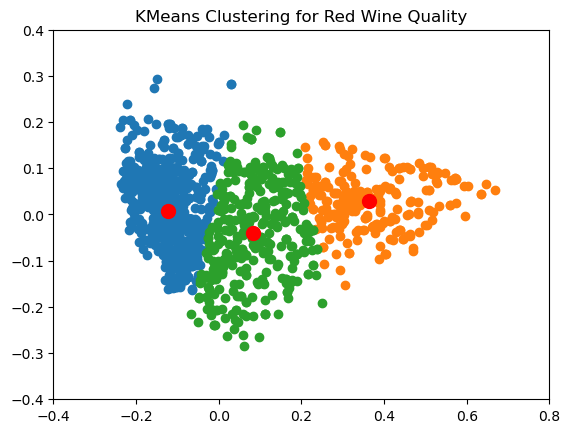

In [129]:
## plotting the 3 clusters with center points

for i in u_labels:
    points= X_red_K[kmeans.labels_==i,:]
    plt.scatter(points[:,0], points[:,1])
    plt.scatter(kmeans.cluster_centers_[i][0], kmeans.cluster_centers_[i][1], s=100, c='red')
plt.title('KMeans Clustering for Red Wine Quality')
plt.xlim(-0.4, 0.8)
plt.ylim(-0.4, 0.4)
plt.legend
plt.show
## ax.set_xlabel()
## ax.set_ylabel()

In [130]:
## adding cluster to the dataset

red_wine['cluster']= Y_red_K_pred
red_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,cluster
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,14.0,38.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,7.9,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0


<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 1500x1000 with 0 Axes>

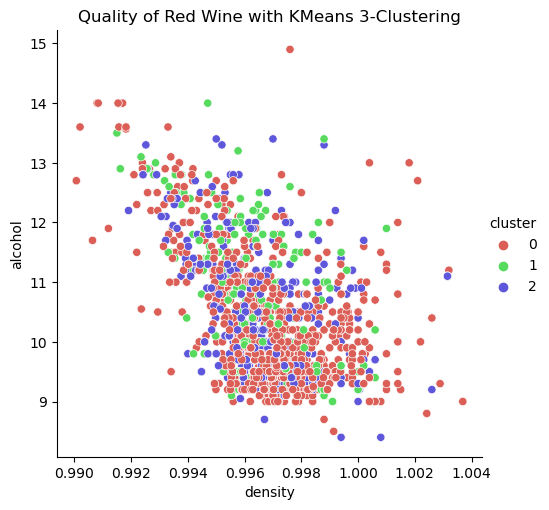

In [131]:
## plot the KMeans clusters for red wine data

plt.figure(figsize=(15,10))

sns.relplot(data= red_wine, x='density', y='alcohol', hue='cluster', palette=sns.color_palette('hls', 3))
plt.xlim()
plt.ylim()
plt.title('Quality of Red Wine with KMeans 3-Clustering')
plt.show

In [132]:
## now KMeans Clustering for white wine with 3 clusters

## first normalize dataset

white_wine_K = normalize(white_wine)
white_wine_K= pd.DataFrame(white_wine_K, columns=white_wine.columns)
white_wine_K.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.039677,0.001530,0.002041,0.029475,0.000255,0.255070,0.963596,0.005674,0.017005,0.002551,0.049880,0.034009
1,0.047219,0.002249,0.002548,0.011992,0.000367,0.104932,0.989359,0.007450,0.024734,0.003673,0.071204,0.044971
2,0.078777,0.002723,0.003890,0.067107,0.000486,0.291767,0.943382,0.009678,0.031705,0.004279,0.098228,0.058353
3,0.037936,0.001212,0.001686,0.044786,0.000306,0.179142,0.980012,0.005246,0.016808,0.002108,0.052162,0.031613
4,0.037936,0.001212,0.001686,0.044786,0.000306,0.179142,0.980012,0.005246,0.016808,0.002108,0.052162,0.031613


In [133]:
## split the dataset for white wine; X_white_K and Y_white_K

X_white_K= white_wine_K.drop(['quality'], axis=1)
X_white_K.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.039677,0.001530,0.002041,0.029475,0.000255,0.255070,0.963596,0.005674,0.017005,0.002551,0.049880
1,0.047219,0.002249,0.002548,0.011992,0.000367,0.104932,0.989359,0.007450,0.024734,0.003673,0.071204
2,0.078777,0.002723,0.003890,0.067107,0.000486,0.291767,0.943382,0.009678,0.031705,0.004279,0.098228
3,0.037936,0.001212,0.001686,0.044786,0.000306,0.179142,0.980012,0.005246,0.016808,0.002108,0.052162
4,0.037936,0.001212,0.001686,0.044786,0.000306,0.179142,0.980012,0.005246,0.016808,0.002108,0.052162


In [134]:
## make prediction

Y_white_K= white_wine_K['quality']
Y_white_K.head()

0    0.034009
1    0.044971
2    0.058353
3    0.031613
4    0.031613
Name: quality, dtype: float64

In [135]:
## reduce the X_white_K to 2 dimensions for clustering

pca= PCA(2)
X_white_K = pca.fit_transform(X_white_K)

In [136]:
## train the KMeans Model 
## since I used 3 clusters Agglomerative Clustering, I will again use 3 clusters with KMeans 

kmeans_white= KMeans(n_clusters=3, init= 'k-means++', max_iter= 300, n_init= 10, random_state= 0)
kmeans_white


KMeans(n_clusters=3, n_init=10, random_state=0)

In [137]:
## make prediction

Y_white_K_pred= kmeans_white.fit_predict(X_white_K)
Y_white_K_pred

array([0, 2, 1, ..., 1, 0, 0], dtype=int32)

In [138]:
## print metrics -  put definitions here

print('With PCA')
print('Homogeneity: {}'.format(metrics.homogeneity_score(Y_white_K, kmeans_white.labels_)))
print('Completeness: {}'.format(metrics.completeness_score(Y_white_K, kmeans_white.labels_)))
print('V-measure: {}'.format(metrics.v_measure_score(Y_white_K, kmeans_white.labels_)))

With PCA
Homogeneity: 0.12286934887131631
Completeness: 1.0000000000000004
V-measure: 0.2188488785357297


/Users/lalebaksi/anaconda3/lib/python3.10/site-packages/sklearn/metrics/cluster/_supervised.py:64: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/lalebaksi/anaconda3/lib/python3.10/site-packages/sklearn/metrics/cluster/_supervised.py:64: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/lalebaksi/anaconda3/lib/python3.10/site-packages/sklearn/metrics/cluster/_supervised.py:64: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)


In [139]:
## print the results 
print('WCSS:', kmeans_white.inertia_)
print('Iternations until converged:', kmeans_white.n_iter_)
print('Final centroids:')
print(kmeans_white.cluster_centers_)
print('Cluster assignments')
print(kmeans_white.labels_)

WCSS: 14.931116810971089
Iternations until converged: 10
Final centroids:
[[-0.02516871 -0.01729744]
 [ 0.08277112  0.00132724]
 [-0.07958341  0.04985378]]
Cluster assignments
[0 2 1 ... 1 0 0]


In [140]:
## label preparation for plotting the clusters
K_labels_white= np.unique(kmeans_white.labels_)
K_labels_white

array([0, 1, 2], dtype=int32)

<function matplotlib.pyplot.show(close=None, block=None)>

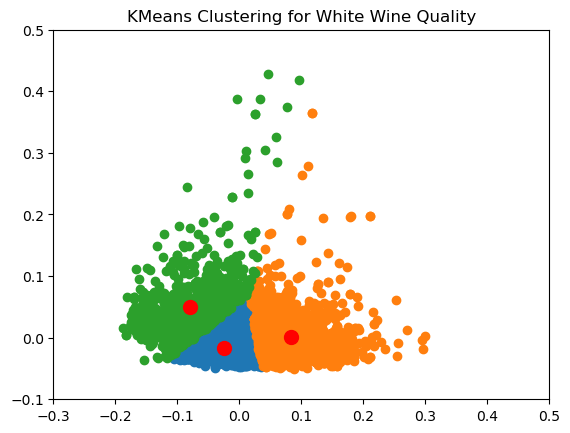

In [142]:
## plotting the 3 clusters with center points

for i in K_labels_white:
    points= X_white_K[kmeans_white.labels_==i,:]
    plt.scatter(points[:,0], points[:,1])
    plt.scatter(kmeans_white.cluster_centers_[i][0], kmeans_white.cluster_centers_[i][1], s=100, c='red')
plt.title('KMeans Clustering for White Wine Quality')
plt.xlim(-0.3, 0.5)
plt.ylim(-0.1, 0.5)
plt.legend
plt.show
## ax.set_xlabel()
## ax.set_ylabel()

In [143]:
## adding cluster to the dataset for white wine

white_wine['cluster']= Y_white_K_pred
white_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,cluster
0,7.0,0.27,0.36,5.2,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,2
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,1
3,7.2,0.23,0.32,8.5,0.058,34.0,186.0,0.9956,3.19,0.40,9.9,6,0
4,7.2,0.23,0.32,8.5,0.058,34.0,186.0,0.9956,3.19,0.40,9.9,6,0


<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 1000x1000 with 0 Axes>

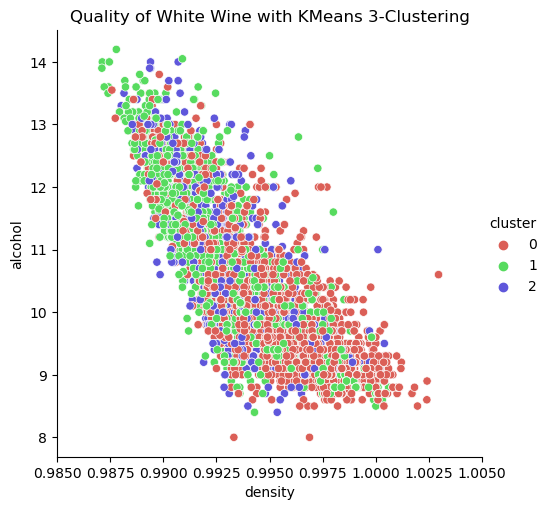

In [144]:
# plot the KMeans clusters for white wine data 

plt.figure(figsize=(10,10))
sns.relplot(data= white_wine, x='density', y='alcohol', hue='cluster', palette=sns.color_palette('hls', 3))
plt.xlim(0.985, 1.005)
plt.ylim()
plt.title('Quality of White Wine with KMeans 3-Clustering')
plt.show

In [ ]:
## TRAIN THE KMEANS MODEL WITH 2 CLUSTERS TO COMPARE for red wine and white wine

In [145]:
## RED WINE WITH KMEANS 2 CLUSTERING

In [146]:
## train the KMeans Model
## since I used 2 clusters Agglomerative Clustering for second version modelling, I will again use 2 clusters with KMeans for comparability

kmeans_2= KMeans(n_clusters=2, init= 'k-means++', max_iter= 300, n_init= 10, random_state= 0)
kmeans_2

KMeans(n_clusters=2, n_init=10, random_state=0)

In [147]:
## make prediction
Y_red_K_pred_2= kmeans_2.fit_predict(X_red_K)
Y_red_K_pred_2

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [148]:
## print the analysis results 
print('WCSS:', kmeans_2.inertia_)
print('Iternations until converged:', kmeans_2.n_iter_)
print('Final centroids:')
print(kmeans_2.cluster_centers_)
print('Cluster assignments')
print(kmeans_2.labels_)

WCSS: 25.333062416311506
Iternations until converged: 8
Final centroids:
[[-0.09523404 -0.00364137]
 [ 0.27983796  0.01069988]]
Cluster assignments
[0 0 0 ... 0 0 0]


In [149]:
## label preparation for plotting the clusters
u_labels_2= np.unique(kmeans_2.labels_)
u_labels_2

array([0, 1], dtype=int32)

<function matplotlib.pyplot.show(close=None, block=None)>

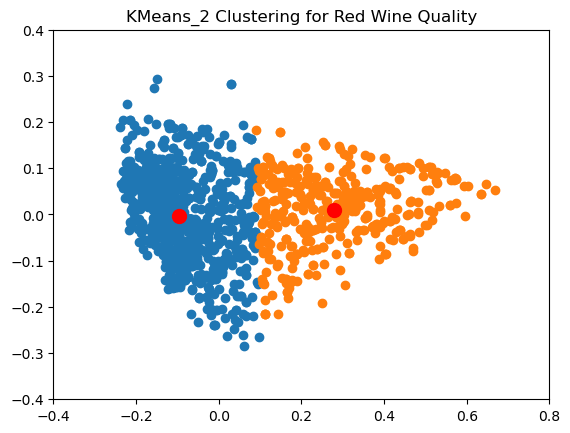

In [150]:
## plotting the 2 clusters with center points

for i in u_labels_2:
    points= X_red_K[kmeans_2.labels_==i,:]
    plt.scatter(points[:,0], points[:,1])
    plt.scatter(kmeans_2.cluster_centers_[i][0], kmeans_2.cluster_centers_[i][1], s=100, c='red')
plt.title('KMeans_2 Clustering for Red Wine Quality')
plt.xlim(-0.4, 0.8)
plt.ylim(-0.4, 0.4)
plt.legend
plt.show
## ax.set_xlabel()
## ax.set_ylabel()

In [153]:
## adding cluster to the dataset
red_wine['cluster']= Y_red_K_pred_2
red_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,cluster
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,14.0,38.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,7.9,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0


<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 1000x800 with 0 Axes>

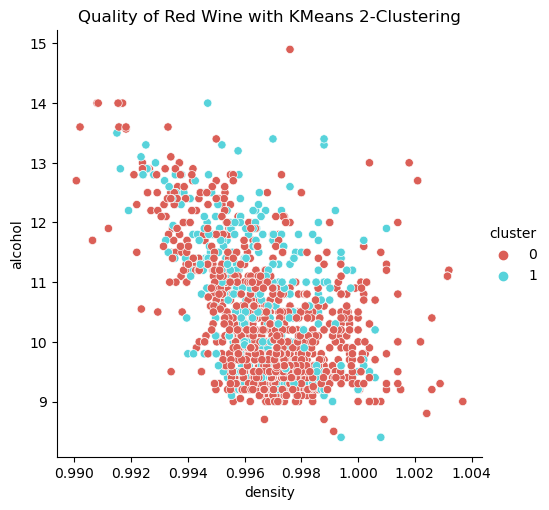

In [154]:
## plot the KMeans clusters for red wine data

plt.figure(figsize=(10,8))

sns.relplot(data= red_wine, x='density', y='alcohol', hue='cluster', palette=sns.color_palette('hls', 2))
plt.xlim()
plt.ylim()
plt.title('Quality of Red Wine with KMeans 2-Clustering')
plt.show

In [ ]:
## WHITE WINE WITH KMEANS 2 CLUSTERING

In [155]:
## make prediction
Y_white_K_pred_2= kmeans_2.fit_predict(X_white_K)
Y_white_K_pred_2

array([0, 1, 0, ..., 0, 1, 1], dtype=int32)

In [156]:
## print the analysis results - checking accuracy against previous model
print('WCSS:', kmeans_2.inertia_)
print('Iternations until converged:', kmeans_2.n_iter_)
print('Final centroids:')
print(kmeans_2.cluster_centers_)
print('Cluster assignments')
print(kmeans_2.labels_)

WCSS: 19.15068031720359
Iternations until converged: 4
Final centroids:
[[ 0.07254467  0.00273209]
 [-0.04530734 -0.00170631]]
Cluster assignments
[0 1 0 ... 0 1 1]


In [157]:
## label preparation for plotting the clusters
u_labels_2= np.unique(kmeans_2.labels_)
u_labels_2

array([0, 1], dtype=int32)

<function matplotlib.pyplot.show(close=None, block=None)>

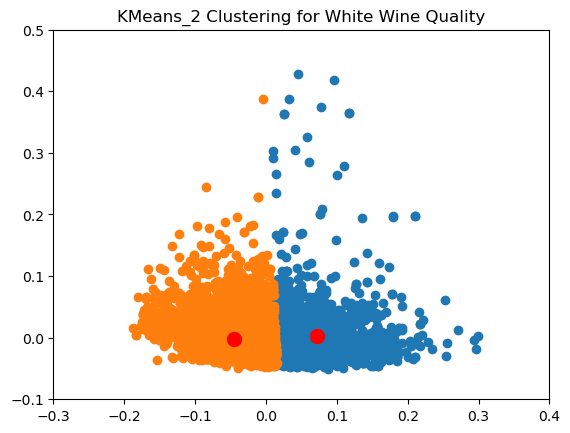

In [158]:
## plotting the 2 clusters with center points

for i in u_labels_2:
    points= X_white_K[kmeans_2.labels_==i,:]
    plt.scatter(points[:,0], points[:,1])
    plt.scatter(kmeans_2.cluster_centers_[i][0], kmeans_2.cluster_centers_[i][1], s=100, c='red')
plt.title('KMeans_2 Clustering for White Wine Quality')
plt.xlim(-0.3, 0.4)
plt.ylim(-0.1, 0.5)
plt.legend
plt.show
## ax.set_xlabel()
## ax.set_ylabel()

In [159]:
## adding cluster to the dataset
white_wine['cluster']= Y_white_K_pred_2
white_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,cluster
0,7.0,0.27,0.36,5.2,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,1
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,0
3,7.2,0.23,0.32,8.5,0.058,34.0,186.0,0.9956,3.19,0.40,9.9,6,1
4,7.2,0.23,0.32,8.5,0.058,34.0,186.0,0.9956,3.19,0.40,9.9,6,1


<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 1000x800 with 0 Axes>

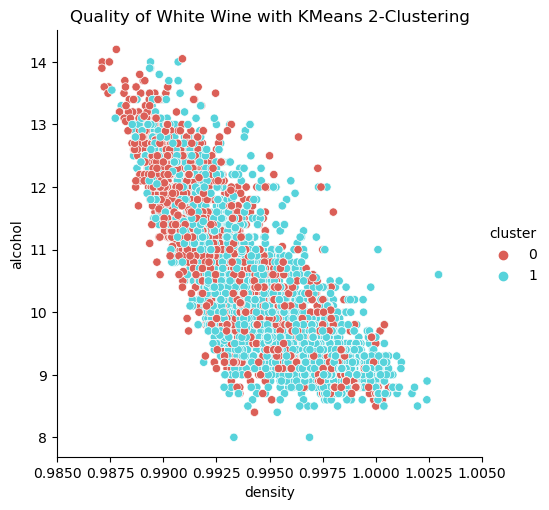

In [160]:
## plot the KMeans clusters for white wine data

plt.figure(figsize=(10,8))
sns.relplot(data= white_wine, x='density', y='alcohol', hue='cluster', palette=sns.color_palette('hls', 2))
plt.xlim(0.985, 1.005)
plt.ylim()
plt.title('Quality of White Wine with KMeans 2-Clustering')
plt.show

## RESULTS:

## Overall, KMeans Classification works better with 3 clusters with much better accuracies.
## And also the size of the dataset has a bigger impact on the accuracy of the test
## White wine dataset modelling prediction is much better than the red wine prediction

                                    					
## Agglomerative Clustering;	           
##  RED WINE - WCSS W/3 CLUSTERS= 23.38
##  RED WINE - WCSS W/2 CLUSTERS= 17.12
##  WHITE WINE - WCSS W/3 CLUSTERS= 19.51
##  WHITE WINE - WCSS W/2 CLUSTERS= 25.59


## Kmeans Clustering;	             
##  RED WINE - WCSS W/3 CLUSTERS= 17.53
##  RED WINE - WCSS W/2 CLUSTERS= 25.33
##  WHITE WINE - WCSS W/3 CLUSTERS= 14.93
##  WHITE WINE - WCSS W/2 CLUSTERS= 19.15
